<a href="https://colab.research.google.com/github/muhtalhakhan/AISummit21/blob/main/ChatGPT4_Twitter_Sentiment_Analysis_and_Visualizations_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**1. Scrape Twitter Data for chagGPT4 Tweets**

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 945.7 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

from wordcloud import ImageColorGenerator

import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 10000 --since 2023-03-13 twitter-search 'chatGPT4' > text-chatGPT4-tweets.json")

0

In [ ]:
import pandas as pd

# creates a pandas dataframe
tweets_df_chatGPT4 = pd.read_json('text-chatGPT4-tweets.json', lines=True)


In [ ]:
tweets_df_chatGPT4.head()


,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/lillithParis/status/163628...,2023-03-16 08:34:16+00:00,"Laurent Alexandre c/ @CNEWS , terrifiant lobby...","Laurent Alexandre c/ @CNEWS , terrifiant lobby...",1636284735084167168,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,NaN,None,"Laurent Alexandre c/ @CNEWS , terrifiant lobby...",[],,[],,lillithParis
1,snscrape.modules.twitter.Tweet,https://twitter.com/danielpikl/status/16362847...,2023-03-16 08:34:09+00:00,I asked #chatGPT4 through @MicrosoftEdge Chat ...,I asked #chatGPT4 through @MicrosoftEdge Chat ...,1636284705023688704,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,2.0,None,I asked #chatGPT4 through @MicrosoftEdge Chat ...,[],,[],,danielpikl
2,snscrape.modules.twitter.Tweet,https://twitter.com/dansingsinghk/status/16362...,2023-03-16 08:33:40+00:00,I am making a test to integrate #chatgpt4 wit...,I am making a test to integrate #chatgpt4 wit...,1636284586358460420,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,1.0,None,I am making a test to integrate #chatgpt4 wit...,[],,[],,dansingsinghk
3,snscrape.modules.twitter.Tweet,https://twitter.com/abnnewspk/status/163628454...,2023-03-16 08:33:29+00:00,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,1636284540124577793,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,4.0,None,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,[],,[],,abnnewspk
4,snscrape.modules.twitter.Tweet,https://twitter.com/CosmasMwamwembe/status/163...,2023-03-16 08:33:27+00:00,This is crazy awesome #chatgpt4 stuff!,This is crazy awesome #chatgpt4 stuff!,1636284530989383683,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,1.0,None,This is crazy awesome #chatgpt4 stuff!,[],,[],,CosmasMwamwembe


**2. Data Loading**

In [ ]:
df_chatGPT4 = tweets_df_chatGPT4[['date', 'rawContent','renderedContent','user','replyCount','retweetCount','likeCount','lang','place','hashtags','viewCount']].copy()

In [ ]:
print(df_chatGPT4.shape)

(8411, 11)


**3. Twitter Data Cleaning , Preprocessing and Exploratory Data Analysis**

In [ ]:
df2=df_chatGPT4.drop_duplicates('renderedContent')

In [ ]:
print(df2.shape)

(8301, 11)


In [ ]:
df2.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount
0,2023-03-16 08:34:16+00:00,"Laurent Alexandre c/ @CNEWS , terrifiant lobby...","Laurent Alexandre c/ @CNEWS , terrifiant lobby...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,fr,None,[ChatGPT4],NaN
1,2023-03-16 08:34:09+00:00,I asked #chatGPT4 through @MicrosoftEdge Chat ...,I asked #chatGPT4 through @MicrosoftEdge Chat ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatGPT4],2.0
2,2023-03-16 08:33:40+00:00,I am making a test to integrate #chatgpt4 wit...,I am making a test to integrate #chatgpt4 wit...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[chatgpt4, VtuberUprsing, VRoidStudio]",1.0
3,2023-03-16 08:33:29+00:00,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ur,None,"[ABNNews, ChatGPT, chatgpt4]",4.0
4,2023-03-16 08:33:27+00:00,This is crazy awesome #chatgpt4 stuff!,This is crazy awesome #chatgpt4 stuff!,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatgpt4],1.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8301 entries, 0 to 8410
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   date             8301 non-null   datetime64[ns, UTC]
 1   rawContent       8301 non-null   object             
 2   renderedContent  8301 non-null   object             
 3   user             8301 non-null   object             
 4   replyCount       8301 non-null   int64              
 5   retweetCount     8301 non-null   int64              
 6   likeCount        8301 non-null   int64              
 7   lang             8301 non-null   object             
 8   place            174 non-null    object             
 9   hashtags         5430 non-null   object             
 10  viewCount        8299 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 778.2+ KB


In [ ]:
df2.date.value_counts()

2023-03-13 07:29:00+00:00    4
2023-03-15 09:02:33+00:00    3
2023-03-14 20:29:40+00:00    3
2023-03-14 23:34:16+00:00    3
2023-03-15 08:24:26+00:00    3
                            ..
2023-03-15 15:37:33+00:00    1
2023-03-15 15:37:46+00:00    1
2023-03-15 15:37:56+00:00    1
2023-03-15 15:37:59+00:00    1
2023-03-13 00:06:35+00:00    1
Name: date, Length: 8027, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

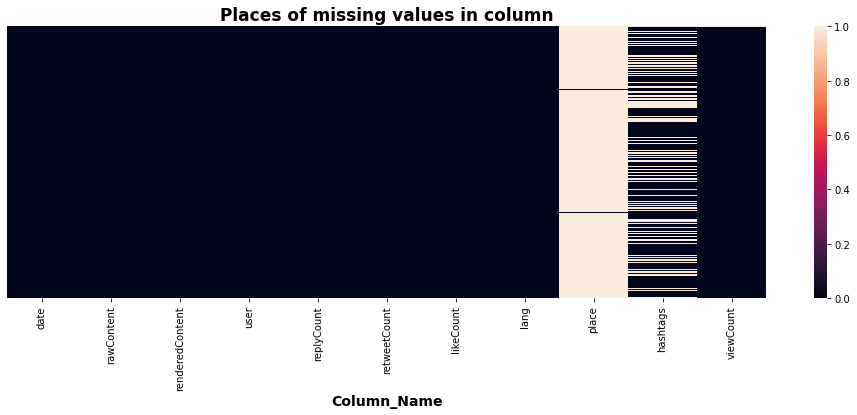

In [ ]:
#Heat Map for missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df2.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= df2['place'].value_counts().head(10)

In [ ]:
print (Top_Location_Of_tweet)

{'_type': 'snscrape.modules.twitter.Place', 'id': '3078869807f9dd36', 'fullName': 'Berlin, Germany', 'name': 'Berlin', 'type': 'city', 'country': 'Germany', 'countryCode': 'DE'}                               5
{'_type': 'snscrape.modules.twitter.Place', 'id': '0073b76548e5984f', 'fullName': 'Sydney, New South Wales', 'name': 'Sydney', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}                     4
{'_type': 'snscrape.modules.twitter.Place', 'id': '5e02a0f0d91c76d2', 'fullName': 'İstanbul, Türkiye', 'name': 'İstanbul', 'type': 'city', 'country': 'Turkey', 'countryCode': 'TR'}                            4
{'_type': 'snscrape.modules.twitter.Place', 'id': '0ee312cd6e4c38cb', 'fullName': 'Campbell River, British Columbia', 'name': 'Campbell River', 'type': 'city', 'country': 'Canada', 'countryCode': 'CA'}       4
{'_type': 'snscrape.modules.twitter.Place', 'id': '001907e868d06e24', 'fullName': 'Dubai, United Arab Emirates', 'name': 'Dubai', 'type': 'admin', 'country': 'U

In [ ]:
import nltk

In [ ]:
stop=nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Twitter Data Cleaning and Preprocessing**

In [ ]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)

    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df2['processed_text'] = df2['renderedContent'].apply(pre_process)



---



In [ ]:
print(df2['processed_text'].head())

0    laurent alexandre c/ , terrifiant lobbyiste du...
1    i asked through chat question, which older cha...
2    i am making a test to integrate with vtuber. s...
3                    چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے 
4                         this is crazy awesome stuff!
Name: processed_text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_bigram(df2['processed_text'], 20)

In [ ]:
print(common_words)

[('chat gpt4', 635), ('chat gpt', 250), ('youtube com', 188), ('openai com', 152), ('2023 03', 114), ('language model', 104), ('com 2023', 102), ('com watch', 98), ('com live', 73), ('代写 代考', 66), ('twitter com', 66), ('live outcgtbnm', 66), ('com research', 63), ('research gpt', 63), ('chatgpt plus', 62), ('com product', 58), ('product gpt', 58), ('watch outcgt', 58), ('bit ly', 57), ('lo que', 57)]


In [ ]:
df3 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
#df3.groupby('TweetText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count',linecolor='black',title='Top 20 bigrams in Tweet before removing spams')

## **4. Sentiment Analysis**

In [ ]:
df3.head()

,TweetText,count
0,chat gpt4,635
1,chat gpt,250
2,youtube com,188
3,openai com,152
4,2023 03,114


In [ ]:
df2.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text
0,2023-03-16 08:34:16+00:00,"Laurent Alexandre c/ @CNEWS , terrifiant lobby...","Laurent Alexandre c/ @CNEWS , terrifiant lobby...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,fr,None,[ChatGPT4],NaN,"laurent alexandre c/ , terrifiant lobbyiste du..."
1,2023-03-16 08:34:09+00:00,I asked #chatGPT4 through @MicrosoftEdge Chat ...,I asked #chatGPT4 through @MicrosoftEdge Chat ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatGPT4],2.0,"i asked through chat question, which older cha..."
2,2023-03-16 08:33:40+00:00,I am making a test to integrate #chatgpt4 wit...,I am making a test to integrate #chatgpt4 wit...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[chatgpt4, VtuberUprsing, VRoidStudio]",1.0,i am making a test to integrate with vtuber. s...
3,2023-03-16 08:33:29+00:00,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ur,None,"[ABNNews, ChatGPT, chatgpt4]",4.0,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے
4,2023-03-16 08:33:27+00:00,This is crazy awesome #chatgpt4 stuff!,This is crazy awesome #chatgpt4 stuff!,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatgpt4],1.0,this is crazy awesome stuff!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Generate sentiment scores
sentiment_scores = df2['processed_text'].apply(sid.polarity_scores)

In [ ]:
df2.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text
0,2023-03-16 08:34:16+00:00,"Laurent Alexandre c/ @CNEWS , terrifiant lobby...","Laurent Alexandre c/ @CNEWS , terrifiant lobby...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,fr,None,[ChatGPT4],NaN,"laurent alexandre c/ , terrifiant lobbyiste du..."
1,2023-03-16 08:34:09+00:00,I asked #chatGPT4 through @MicrosoftEdge Chat ...,I asked #chatGPT4 through @MicrosoftEdge Chat ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatGPT4],2.0,"i asked through chat question, which older cha..."
2,2023-03-16 08:33:40+00:00,I am making a test to integrate #chatgpt4 wit...,I am making a test to integrate #chatgpt4 wit...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[chatgpt4, VtuberUprsing, VRoidStudio]",1.0,i am making a test to integrate with vtuber. s...
3,2023-03-16 08:33:29+00:00,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,ur,None,"[ABNNews, ChatGPT, chatgpt4]",4.0,چیٹ جی پی ٹی 4 کیا کچھ کرسکتا ہے
4,2023-03-16 08:33:27+00:00,This is crazy awesome #chatgpt4 stuff!,This is crazy awesome #chatgpt4 stuff!,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatgpt4],1.0,this is crazy awesome stuff!


In [ ]:
%matplotlib inline
plt.close('all')

In [ ]:
df2['hashtags'].value_counts()



[chatgpt4]                                                1106
[ChatGPT4]                                                 404
[ChatGPT, chatgpt4]                                        158
[chatgpt4, ChatGPT]                                         56
[ChatGPT, ChatGPT4]                                         50
                                                          ... 
[苹果id, 美区id, 小火箭, 节点, chatgpt]                               1
[chatgpt4, Chatgpt, chatbot]                                 1
[ChatGPT4, openAI, Vue]                                      1
[OpenIA, ChatGPT, chatgpt4]                                  1
[AI, ChatGPT, ChatGPT4, Microsoft, Nigeria, NigeriaAI]       1
Name: hashtags, Length: 2794, dtype: int64

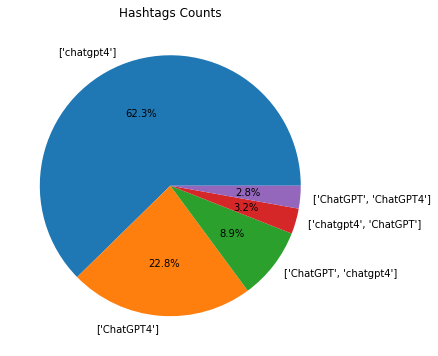

In [ ]:
import matplotlib.pyplot as plt

hashtags_counts = df2['hashtags'].value_counts().head(5)
plt.figure(figsize=(10,6))
plt.pie(hashtags_counts.values, labels=hashtags_counts.index, autopct='%1.1f%%')
plt.title('Hashtags Counts')
plt.show()

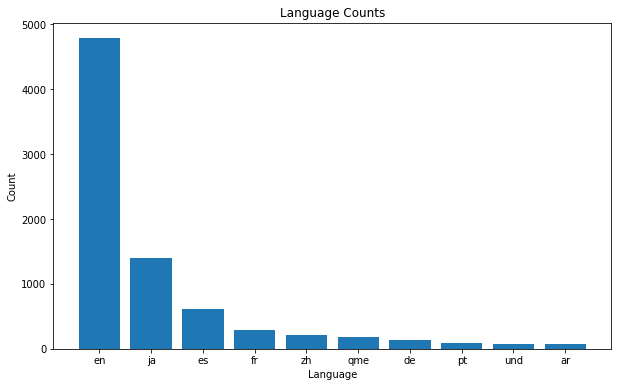

In [ ]:
#df2['lang'].value_counts()

import matplotlib.pyplot as plt

lang_counts = df2['lang'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(lang_counts.index, lang_counts.values)
plt.title('Language Counts')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


In [ ]:
df2['country'] = df2['place'].apply(lambda x: x['country'] if x else None)
df2['countryCode'] = df2['place'].apply(lambda x: x['countryCode'] if x else None)

In [ ]:
top_location_of_tweet = df2['country'].value_counts()
top_location_of_tweet.head(20)

United States                 26
India                         21
Japan                         14
United Kingdom                12
Pakistan                       8
Germany                        7
Australia                      6
Singapore                      6
Spain                          6
Brazil                         6
France                         5
Canada                         5
United Arab Emirates           4
People's Republic of China     4
The Netherlands                4
Turkey                         4
Argentina                      3
Belgium                        3
Finland                        2
Ireland                        2
Name: country, dtype: int64

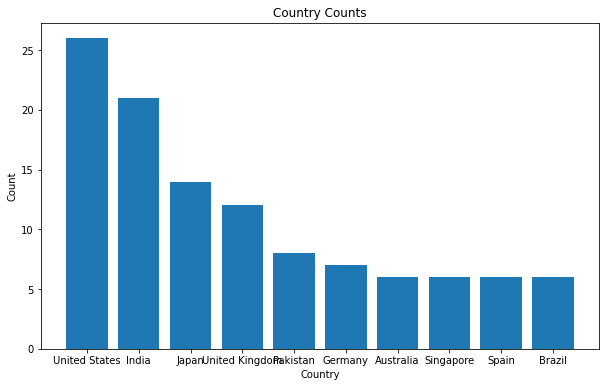

In [ ]:

import matplotlib.pyplot as plt

country_counts = df2['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values)
plt.title('Country Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
df2['date_column'] = df2['date'].dt.date

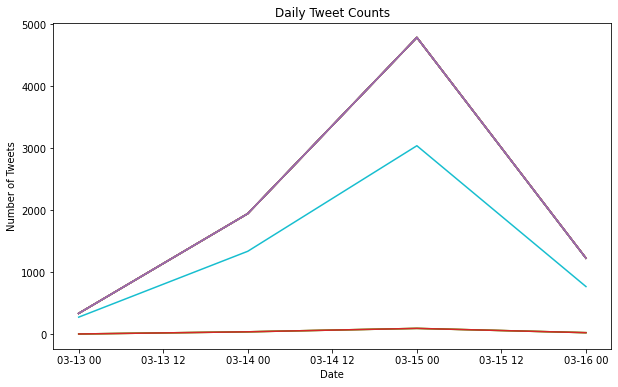

In [ ]:
#Number of Tweets per day

# group the data by day and count the number of tweets per day
daily_counts = df2.groupby(df2['date'].dt.date).count()

# create a line chart of the daily tweet counts
plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Daily Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()





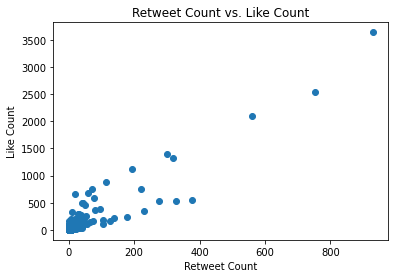

In [ ]:
# Create a scatter plot of retweet count vs. like count
plt.scatter(df2['retweetCount'], df2['likeCount'])
plt.title('Retweet Count vs. Like Count')
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.show()

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from textblob import TextBlob

# Define a function to perform sentiment analysis on a tweet using TextBlob
def analyze_sentiment(tweet):
    # Create a TextBlob object for the tweet
    blob = TextBlob(tweet)

    # Use TextBlob to calculate the sentiment polarity of the tweet
    polarity = blob.sentiment.polarity

    # Return the sentiment polarity
    return polarity


# Apply the sentiment analysis function to each tweet in the DataFrame
df2['sentiment'] = df2['processed_text'].apply(analyze_sentiment)

# Print the resulting DataFrame
print(df2.head())



        date                                         rawContent  \
0 2023-03-16  Laurent Alexandre c/ @CNEWS , terrifiant lobby...   
1 2023-03-16  I asked #chatGPT4 through @MicrosoftEdge Chat ...   
2 2023-03-16  I am making a test to integrate #chatgpt4  wit...   
3 2023-03-16  چیٹ جی پی  ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...   
4 2023-03-16             This is crazy awesome #chatgpt4 stuff!   

                                     renderedContent  \
0  Laurent Alexandre c/ @CNEWS , terrifiant lobby...   
1  I asked #chatGPT4 through @MicrosoftEdge Chat ...   
2  I am making a test to integrate #chatgpt4  wit...   
3  چیٹ جی پی  ٹی 4 کیا کچھ کرسکتا ہے\n@MunibHamid...   
4             This is crazy awesome #chatgpt4 stuff!   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...    

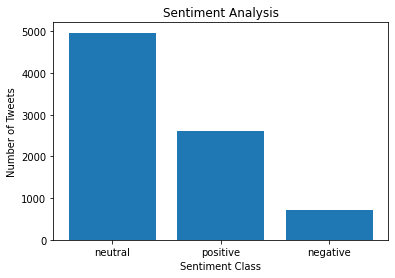

In [ ]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the classify_sentiment function to each sentiment polarity value in the DataFrame
df2['sentiment_type'] = df2['sentiment'].apply(classify_sentiment)


sentiment_counts = df2['sentiment_type'].value_counts()

# Create a bar plot of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add a title and labels for the x and y axes
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')

# Show the plot
plt.show()

**Create Word Cloud**

In [ ]:
very_positive_tweets = df2[df2['sentiment'] > 0.3]

# display only the tweet and sentiment score columns

In [ ]:
very_positive_tweets.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text,country,countryCode,date_column,sentiment,sentiment_type
7,2023-03-16,...make things visible. Programming is done in...,...make things visible. Programming is done in...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,NaN,...make things visible. programming is done in...,None,None,2023-03-16,0.366667,positive
14,2023-03-16,🚨Attention Content Creators!🚨 GPT-4 is here an...,🚨Attention Content Creators!🚨 GPT-4 is here an...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,en,None,"[ChatGPT, chatgpt4, gpt4, contentcreation, cre...",17.0,🚨attention content creators!🚨 gpt-4 is here an...,None,None,2023-03-16,0.497768,positive
26,2023-03-16,GPT-4 can accept both image and text inputs fo...,GPT-4 can accept both image and text inputs fo...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[GPT4, Chatgpt4, OpenAI, Deeplearning, artific...",12.0,gpt-4 can accept both image and text inputs fo...,None,None,2023-03-16,0.750000,positive
37,2023-03-16,RT @heykahn\n\nGreat thread on what next with ...,RT @heykahn\n\nGreat thread on what next with ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatgpt4],58.0,rt great thread on what next with 👇,None,None,2023-03-16,0.400000,positive
45,2023-03-16,"""I don't need ChatGpt"" 🤣\nGet the latest app m...","""I don't need ChatGpt"" 🤣\nGet the latest app m...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,en,None,"[ChatGPT, chatgpt4, openai, AI, Developer, pro...",17.0,"""i don't need chatgpt"" 🤣 get the latest app ma...",None,None,2023-03-16,0.500000,positive


In [ ]:
very_negative_tweets = df2[df2['sentiment'] < 0]

In [ ]:
very_negative_tweets.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text,country,countryCode,date_column,sentiment,sentiment_type
15,2023-03-16,"I'm disappointed, #chatgpt4 . Still not up to ...","I'm disappointed, #chatgpt4 . Still not up to ...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatgpt4],9.0,"i'm disappointed, . still not up to date, and ...",None,None,2023-03-16,-0.750000,negative
24,2023-03-16,"GPT-4 Is Exciting and Scary: ""We don’t yet kno...","GPT-4 Is Exciting and Scary: ""We don’t yet kno...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[chatgpt4],14.0,"gpt-4 is exciting and scary: ""we don’t yet kno...",None,None,2023-03-16,-0.100000,negative
33,2023-03-16,@PTVNewsOfficial @BY dunya #chatgpt4 ki bat kr...,@PTVNewsOfficial @BY dunya #chatgpt4 ki bat kr...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,hi,None,"[chatgpt4, NEOM]",4.0,"dunya ki bat kr rhi hy, ki bat kr rhi hy, tum...",None,None,2023-03-16,-0.500000,negative
38,2023-03-16,I used #chatgpt4 to study the lives of 1000 lo...,I used #chatgpt4 to study the lives of 1000 lo...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[chatgpt4, ChatGPT]",14.0,i used to study the lives of 1000 lottery winn...,None,None,2023-03-16,-0.171266,negative
42,2023-03-16,Just heard Elon Musk is designing a Formula 1 ...,Just heard Elon Musk is designing a Formula 1 ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[ChatGPT4, midjourney5, jokes]",10.0,just heard elon musk is designing a formula 1 ...,None,None,2023-03-16,-0.155556,negative


In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

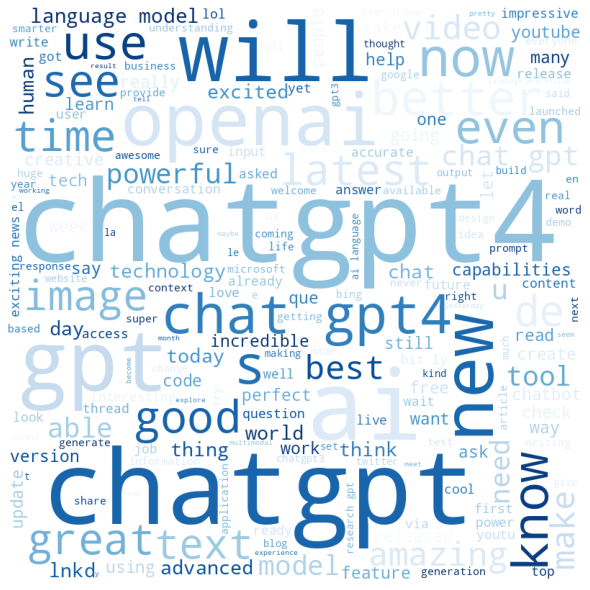

In [ ]:
# concatenate all the very positive tweets into a single string
all_tweets = ' '.join(very_positive_tweets['processed_text'])

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate(all_tweets)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
all_words = nltk.word_tokenize(all_tweets.lower())
all_words = [word for word in all_words if word not in stopwords.words('english')]
all_words = [word for word in all_words if word not in string.punctuation]

# count the frequency of each word using a dictionary
word_freq = Counter(all_words)

# sort the words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# display the top 20 words with their frequencies
top_words = sorted_words[:20]
for word, freq in top_words:
    print(f'{word}: {freq}')

chatgpt4: 268
's: 219
ai: 194
chatgpt: 162
gpt-4: 131
’: 127
chat: 124
n't: 75
better: 75
``: 73
latest: 72
openai: 71
language: 71
new: 70
model: 68
gpt4: 67
use: 65
'': 65
good: 63
see: 61


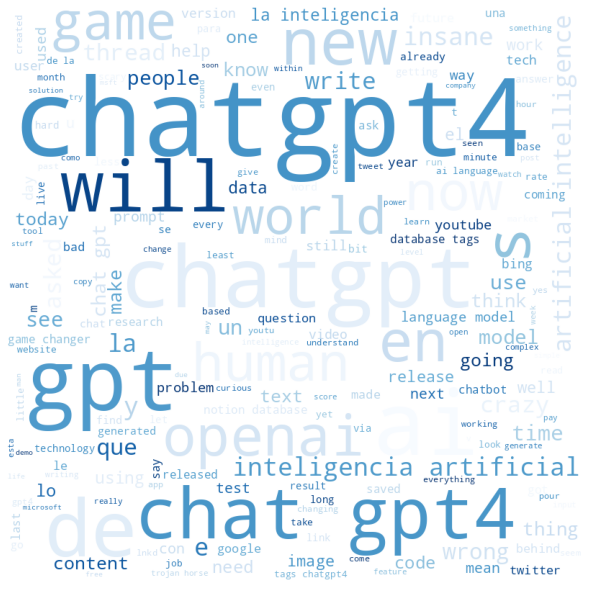

In [ ]:
# concatenate all the very positive tweets into a single string
all_tweets=" "
all_tweets = ' '.join(very_negative_tweets['processed_text'])

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate(all_tweets)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Sentiment **Analysis**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [ ]:
df3 = df2[['processed_text', 'sentiment_type']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3['processed_text'], df3['sentiment_type'], random_state=0)


In [ ]:
# Convert text into numerical vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7297687861271677
